In [502]:
%pip install pandas statsmodels seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [503]:
# インポート
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [504]:
# JSONLファイルのパス
jsonl_file_path = './data/listings_2024_sales.json'  # ご自身のファイルパスに置き換えてください

# データをDataFrameに変換
df = pd.read_json(jsonl_file_path, lines=True)


In [505]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,stay_operation_type,prefecture_name,city_name,floor_plan,sqm,number_of_capacity,...,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,住宿,東京都,渋谷区,1R,19.00,2,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8072.677748,12576.291667,6528.581548
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,特区民泊,大阪府,大阪市港区,1DK,27.00,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5595.319149,5883.578947,5000.000000
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,住宿,東京都,大田区,1K,25.99,4,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8341.010638,11029.804054,6595.653509
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,住宿,東京都,墨田区,1K,37.24,5,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,8459.772487,13115.636364,7268.737542
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,住宿,東京都,新宿区,1R,18.55,3,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,8288.753623,10153.216216,6132.968750


In [506]:
# 統計情報

df.describe()

,sqm,number_of_capacity,location_floor,built_year,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
count,1599.000000,1599.000000,1551.000000,1598.000000,31.000000,64.000000,171.000000,1.0,2.0,31.000000,50.000000,1599.000000,1599.000000,1599.000000
mean,27.255066,3.255159,3.703417,2014.397372,1.483871,1.375000,1.105263,1.0,1.0,1.322581,1.040000,9569.396606,11888.186557,7308.135433
std,11.365421,1.440496,2.160880,14.598030,0.676805,0.519462,0.447905,NaN,0.0,0.475191,0.197949,3948.880015,5857.820130,2631.249355
min,10.710000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,4917.394487,4734.975610,2105.238095
25%,20.130000,2.000000,2.000000,2014.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,7225.552140,8312.126603,5917.189347
50%,25.450000,3.000000,3.000000,2022.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,8565.012195,10755.725000,6738.402878
75%,30.180000,4.000000,5.000000,2023.000000,2.000000,2.000000,1.000000,1.0,1.0,2.000000,1.000000,10278.724820,13285.633784,7798.802494
max,106.100000,12.000000,19.000000,2024.000000,4.000000,3.000000,4.000000,1.0,1.0,2.000000,2.000000,45828.060000,67264.141593,31972.223350


In [507]:
# 欠損値の数
df.isnull().sum()


manual_id                 0
listing_name              0
room_type_id              0
owner_name                0
stay_operation_type       0
prefecture_name           0
city_name                 0
floor_plan                0
sqm                       0
number_of_capacity        0
has_elevator           1320
has_auto_lock          1325
first_line                1
first_station             1
first_walk_min            1
location_floor           48
built_year                1
tag                       0
number_of_s_beds       1568
number_of_sd_beds      1535
number_of_d_beds       1428
number_of_q_beds       1598
number_of_k_beds       1597
number_of_futons       1568
number_of_sofa_beds    1549
total_adr                 0
minpaku_adr               0
monthly_adr               0
dtype: int64

In [508]:
# ダミー変数の追加

df = pd.get_dummies(df, columns=[
    'stay_operation_type',
    'prefecture_name',
    'city_name',
    'floor_plan',
    'tag',
    'first_station',
    'first_line',
], drop_first=True)

df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_都営地下鉄大江戸線,first_line_都営大江戸線,first_line_都営大江戸線・東京メトロ副都心線,first_line_都営新宿線,first_line_都営浅草線,first_line_都電荒川線,first_line_阪急電鉄神戸線,first_line_阪神なんば線,first_line_阪神電鉄阪神なんば線,first_line_ＪＲ中央線
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,無,無,8,4.0,...,False,False,False,False,False,False,False,False,False,False
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,27.00,4,None,None,10,1.0,...,False,False,False,False,False,False,False,False,False,False
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,有,有,5,4.0,...,False,False,False,False,False,False,False,False,False,False
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,有,有,4,5.0,...,False,True,False,False,False,False,False,False,False,False
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,無,無,3,2.0,...,False,False,False,False,False,False,False,False,False,False


In [509]:
# 欠損値の処理

df['number_of_s_beds'].fillna(0, inplace=True)
df['number_of_sd_beds'].fillna(0, inplace=True)
df['number_of_d_beds'].fillna(0, inplace=True)
df['number_of_q_beds'].fillna(0, inplace=True)
df['number_of_k_beds'].fillna(0, inplace=True)
df['number_of_futons'].fillna(0, inplace=True)
df['number_of_sofa_beds'].fillna(0, inplace=True)

df['first_walk_min'] = pd.to_numeric(df['first_walk_min'], errors='coerce')

df['has_elevator'] = df['has_elevator'].map({'有': 1, '無': 0})
df['has_elevator'].fillna(0.5, inplace=True)

df['has_auto_lock'] = df['has_auto_lock'].map({'有': 1, '無': 0})
df['has_auto_lock'].fillna(0.5, inplace=True)

df = df.dropna()

df.isnull().sum()

/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_32423/10565926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_s_beds'].fillna(0, inplace=True)
/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_32423/10565926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

manual_id                0
listing_name             0
room_type_id             0
owner_name               0
sqm                      0
                        ..
first_line_都電荒川線         0
first_line_阪急電鉄神戸線       0
first_line_阪神なんば線        0
first_line_阪神電鉄阪神なんば線    0
first_line_ＪＲ中央線         0
Length: 265, dtype: int64

In [510]:
# built_yearは築年数に変換

df['built_year'] = 2024 - df['built_year']

In [511]:
# floor_planの変換

# 1Rから始まるものはfloor_plan_group_1Rにまとめる
df['floor_plan_group_1R'] = df[[column for column in df.columns if column.startswith('floor_plan_1R')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1R')], axis=1, inplace=True)

# floor_plan_1DK+Sとfloor_plan_1DKSはfloor_plan_1SDKにまとめる
df['floor_plan_1SDK'] = df[['floor_plan_1DKS', 'floor_plan_1DK+S', 'floor_plan_1DKS']].any(axis=1).astype(int)
df.drop(['floor_plan_1DK+S', 'floor_plan_1DKS'], axis=1, inplace=True)

# 1Kから始まるものはfloor_plan_group_1Kにまとめる
df['floor_plan_group_1K'] = df[[column for column in df.columns if column.startswith('floor_plan_1K')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1K')], axis=1, inplace=True)

# floor_plan_２LDKはfloor_plan_2LDKにまとめる
df['floor_plan_2LDK'] = df[['floor_plan_２LDK', 'floor_plan_2LDK']].any(axis=1).astype(int)
df.drop(['floor_plan_２LDK'], axis=1, inplace=True)

# データがないカラムを一部削除
df.drop(["floor_plan_4DK", "floor_plan_4LDK", "floor_plan_戸建"], axis=1, inplace=True)

In [512]:
# 寝具関連の変換

# number_of_sd_bedsは>0かどうかでbooleanに変換
df['has_sd_bed'] = (df['number_of_sd_beds'] > 0).astype(int)
df.drop('number_of_sd_beds', axis=1, inplace=True)

df['has_d_bed'] = (df['number_of_d_beds'] > 0).astype(int)
df.drop('number_of_d_beds', axis=1, inplace=True)

df['has_q_bed'] = (df['number_of_q_beds'] > 0).astype(int)
df.drop('number_of_q_beds', axis=1, inplace=True)

df['has_k_bed'] = (df['number_of_k_beds'] > 0).astype(int)
df.drop('number_of_k_beds', axis=1, inplace=True)

df['has_futon'] = (df['number_of_futons'] > 0).astype(int)
df.drop('number_of_futons', axis=1, inplace=True)

df['has_sofa_bed'] = (df['number_of_sofa_beds'] > 0).astype(int)
df.drop('number_of_sofa_beds', axis=1, inplace=True)

In [513]:
# city_nameを変換

# city_nameで始まるもののうち、city_name_大阪市から始まるものはまとめる: いずれかのcity_nameの部分がtrueならば、city_name_大阪市もtrue
df['city_name_大阪市'] = df[[col for col in df.columns if col.startswith('city_name_大阪市')]].any(axis=1)
df.drop([col for col in df.columns if col.startswith('city_name_大阪市') and col != 'city_name_大阪市'], axis=1, inplace=True)

df = df[df['prefecture_name_東京都'] == 1]

In [514]:
# 収容人数による寄与を分離

# ADRを一人当たりにしてみる
df['minpaku_adr_per_person'] = df['minpaku_adr'] / df['number_of_capacity']
df['monthly_adr_per_person'] = df['monthly_adr'] / df['number_of_capacity']

# 収容人数あたりのsqm
df['sqm_per_person'] = df['sqm'] / df['number_of_capacity']

array([[<Axes: xlabel='sqm_per_person', ylabel='sqm_per_person'>,
        <Axes: xlabel='number_of_capacity', ylabel='sqm_per_person'>,
        <Axes: xlabel='has_elevator', ylabel='sqm_per_person'>,
        <Axes: xlabel='has_auto_lock', ylabel='sqm_per_person'>,
        <Axes: xlabel='first_walk_min', ylabel='sqm_per_person'>,
        <Axes: xlabel='built_year', ylabel='sqm_per_person'>,
        <Axes: xlabel='minpaku_adr_per_person', ylabel='sqm_per_person'>],
       [<Axes: xlabel='sqm_per_person', ylabel='number_of_capacity'>,
        <Axes: xlabel='number_of_capacity', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_elevator', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_auto_lock', ylabel='number_of_capacity'>,
        <Axes: xlabel='first_walk_min', ylabel='number_of_capacity'>,
        <Axes: xlabel='built_year', ylabel='number_of_capacity'>,
        <Axes: xlabel='minpaku_adr_per_person', ylabel='number_of_capacity'>],
       [<Axes: xlabel='sqm_per_perso

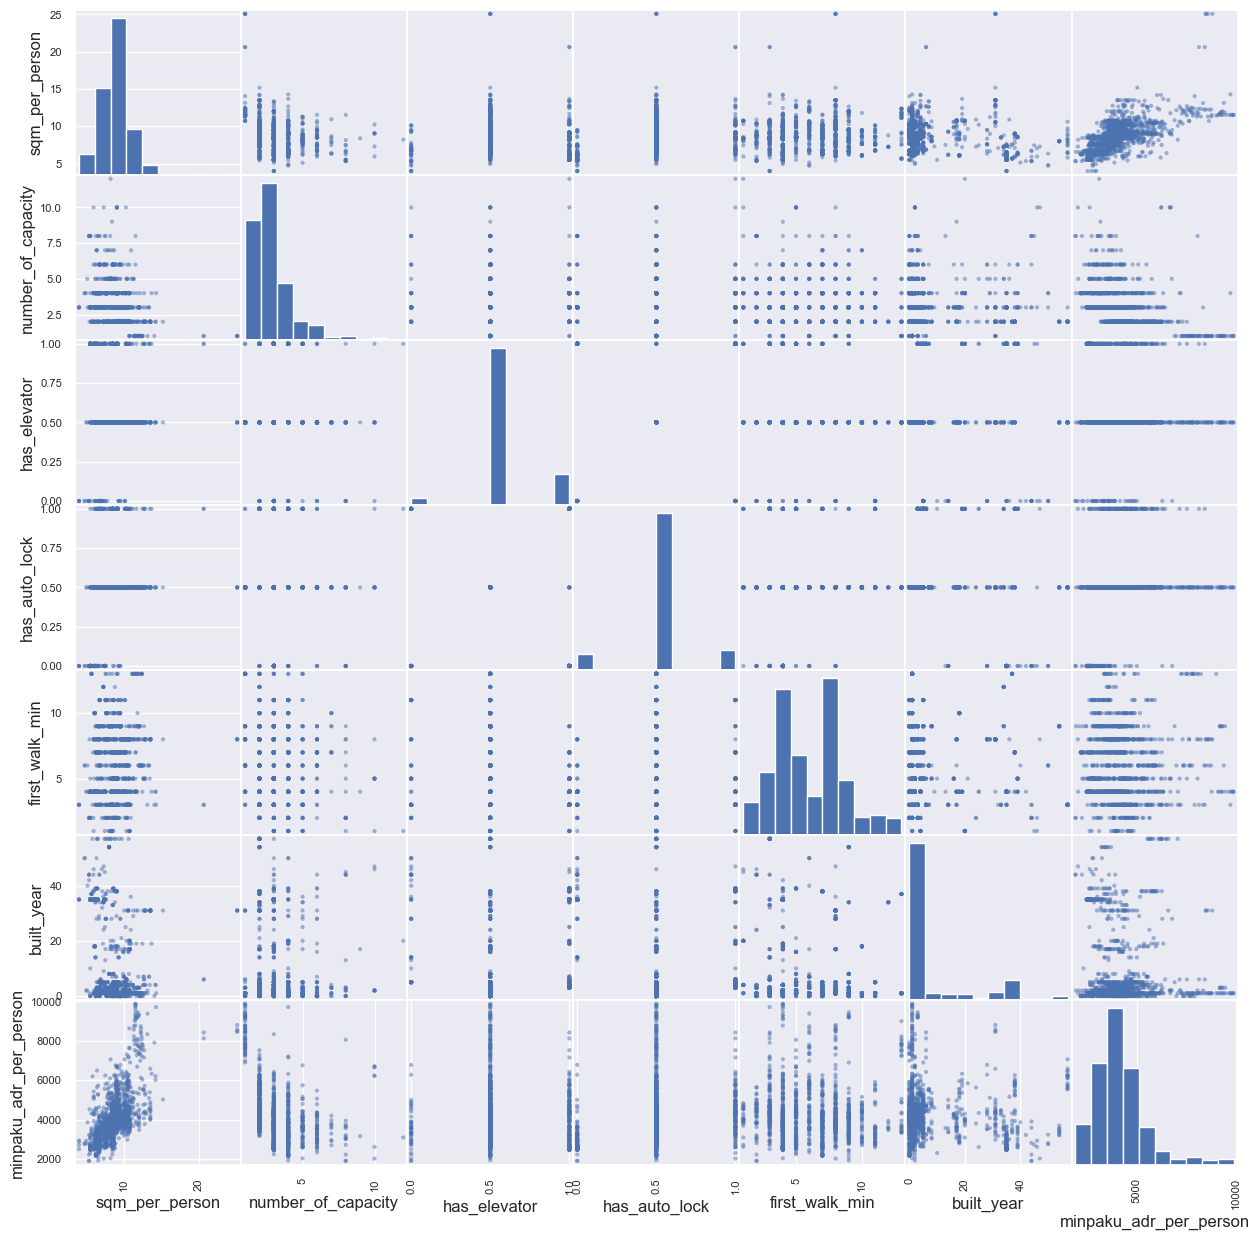

In [515]:
from pandas import plotting

plotting.scatter_matrix(
    df[[
        "sqm_per_person",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "built_year",
        "minpaku_adr_per_person",
    ]],
    figsize=(15, 15),
)

<Axes: >

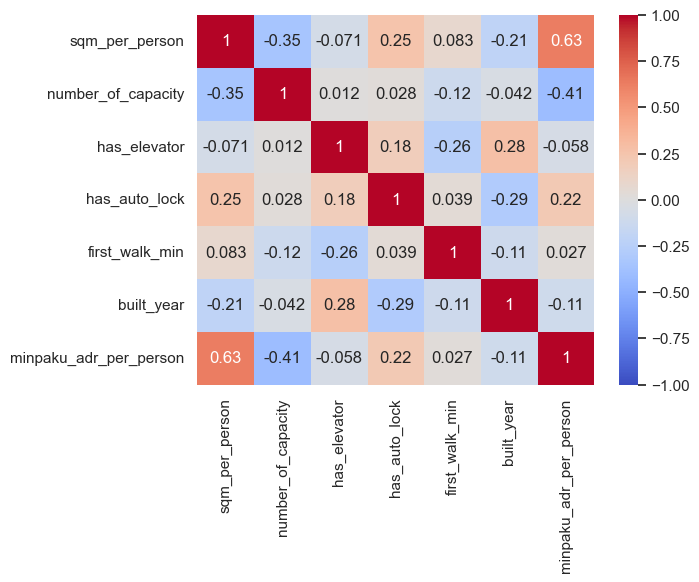

In [516]:
sns.heatmap(
    df[[
        "sqm_per_person",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "built_year",
        "minpaku_adr_per_person",
    ]].corr(),
    vmin=-1, annot=True, cmap='coolwarm')

In [517]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,city_name_大阪市,minpaku_adr_per_person,monthly_adr_per_person,sqm_per_person
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,0.0,0.0,8.0,4.0,...,0,1,0,0,0,0,False,6288.145833,3264.290774,9.500000
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,1.0,1.0,5.0,4.0,...,0,1,0,0,0,0,False,2757.451014,1648.913377,6.497500
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,1.0,1.0,4.0,5.0,...,1,0,0,0,0,0,False,2623.127273,1453.747508,7.448000
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,0.0,0.0,3.0,2.0,...,0,0,0,0,1,0,False,3384.405405,2044.322917,6.183333
5,104-3,ヴィンテージデザイン神楽坂 201,b99f5f56-4263-4cc8-8096-8b379f1230ff,MT,18.55,3,0.0,0.0,3.0,2.0,...,0,0,0,0,1,0,False,3569.141487,2011.463918,6.183333


In [518]:
# 統計情報

df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,total_adr,minpaku_adr,...,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,minpaku_adr_per_person,monthly_adr_per_person,sqm_per_person
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,...,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,26.600391,3.137067,0.561533,0.511054,5.980840,3.564480,8.706706,0.033161,9823.481048,12382.025623,...,0.394252,0.045689,0.113486,0.000737,0.000737,0.019897,0.030951,4187.313086,2583.378405,8.788579
std,11.096376,1.364993,0.210548,0.216969,2.628062,2.086197,13.751569,0.242145,3879.504276,5713.303612,...,0.488870,0.208887,0.317302,0.027146,0.027146,0.139697,0.173248,1336.696993,971.604755,2.042238
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4917.394487,6382.460674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1918.402388,701.746032,4.000000
25%,19.440000,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,7519.643357,8804.579545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3335.358974,1967.289116,7.580000
50%,25.350000,3.000000,0.500000,0.500000,5.000000,3.000000,2.000000,0.000000,8885.598928,11160.066474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3971.717381,2374.378109,8.580000
75%,30.080000,4.000000,0.500000,0.500000,8.000000,5.000000,6.000000,0.000000,10435.243697,13613.234899,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4612.332192,2956.641304,9.890000
max,102.400000,12.000000,1.000000,1.000000,13.000000,19.000000,57.000000,4.000000,45828.060000,67264.141593,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9878.042105,7689.480000,25.080000


In [519]:
# 説明変数の定義
features = [
    # 'number_of_capacity',
    # 'has_auto_lock',
    'first_walk_min',
    'sqm_per_person',
]

features += [col for col in df.columns if col.startswith('stay_operation_type_')]

# features += [col for col in df.columns if col.startswith('city_name_')]

X = df[features].astype(float)

features

['first_walk_min',
 'sqm_per_person',
 'stay_operation_type_旅館業',
 'stay_operation_type_特区民泊']

In [520]:
# 相関係数を確認
cor = df[features].corr()

cor


,first_walk_min,sqm_per_person,stay_operation_type_旅館業,stay_operation_type_特区民泊
first_walk_min,1.000000,0.082969,-0.020476,-0.052218
sqm_per_person,0.082969,1.000000,0.029417,-0.073244
stay_operation_type_旅館業,-0.020476,0.029417,1.000000,-0.006091
stay_operation_type_特区民泊,-0.052218,-0.073244,-0.006091,1.000000


In [521]:
df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,total_adr,minpaku_adr,...,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,minpaku_adr_per_person,monthly_adr_per_person,sqm_per_person
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,...,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,26.600391,3.137067,0.561533,0.511054,5.980840,3.564480,8.706706,0.033161,9823.481048,12382.025623,...,0.394252,0.045689,0.113486,0.000737,0.000737,0.019897,0.030951,4187.313086,2583.378405,8.788579
std,11.096376,1.364993,0.210548,0.216969,2.628062,2.086197,13.751569,0.242145,3879.504276,5713.303612,...,0.488870,0.208887,0.317302,0.027146,0.027146,0.139697,0.173248,1336.696993,971.604755,2.042238
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4917.394487,6382.460674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1918.402388,701.746032,4.000000
25%,19.440000,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,7519.643357,8804.579545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3335.358974,1967.289116,7.580000
50%,25.350000,3.000000,0.500000,0.500000,5.000000,3.000000,2.000000,0.000000,8885.598928,11160.066474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3971.717381,2374.378109,8.580000
75%,30.080000,4.000000,0.500000,0.500000,8.000000,5.000000,6.000000,0.000000,10435.243697,13613.234899,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4612.332192,2956.641304,9.890000
max,102.400000,12.000000,1.000000,1.000000,13.000000,19.000000,57.000000,4.000000,45828.060000,67264.141593,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9878.042105,7689.480000,25.080000


In [522]:
# VIFの計算

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFの計算
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values('VIF', ascending=False)


,feature,VIF
1,sqm_per_person,5.276689
0,first_walk_min,5.237017
3,stay_operation_type_特区民泊,1.040467
2,stay_operation_type_旅館業,1.002045


In [523]:
high_vif = vif_data[vif_data['VIF'] > 7]['feature']

X = X.drop(columns=high_vif)


print("VIFが7を超える変数:")
high_vif

VIFが7を超える変数:


Series([], Name: feature, dtype: object)

In [524]:
# 特徴量とターゲットの選択
target = 'minpaku_adr_per_person'

X = X.astype(float)

y = df[target]

X = add_constant(X)

# 線形回帰モデルの構築
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     minpaku_adr_per_person   R-squared:                       0.440
Model:                                OLS   Adj. R-squared:                  0.438
Method:                     Least Squares   F-statistic:                     265.1
Date:                    Wed, 06 Nov 2024   Prob (F-statistic):          3.00e-168
Time:                            15:50:08   Log-Likelihood:                -11300.
No. Observations:                    1357   AIC:                         2.261e+04
Df Residuals:                        1352   BIC:                         2.264e+04
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      778.6846    132.283      5.886      0.000     519.182    1038.187
first_walk_min             -17.7394     10.405     -1.705      0.088     -38.152       2.673
sqm_per_person             406.7042     13.411     30.327      0.000     380.396     433.012
stay_operation_type_旅館業   -643.5618   1003.240     -0.641      0.521   -2611.638    1324.514
stay_operation_type_特区民泊 -1234.9249    127.873     -9.657      0.000   -1485.777    -984.073
==============================================================================
Omnibus:                      375.711   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1050.313
Skew:                           1.420   Prob(JB):                    8.46e-229
Kurtosis:                       6.241   Cond. No.                         403.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [525]:
# Ridge回帰のR^2を計算

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("Ridge回帰の平均R²:", scores.mean())

Ridge回帰の平均R²: 0.4342102871749308
